In [3]:
# Part 1: Data preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[: , 1:] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 Making ANN

# Importing Keras library and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN. (Defining it as sequence of layers or defining the graph; 2 methods)
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding another hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding another hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # soft_max instead of sigmoid if wanted to have more dimensions in sigmoid function

# "units" should be tested with parameter tuning like K fold cross validation,
# you could also use average of input layers and average of output layer (weak rule, but better than nothing)

# Compiling the ANN 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # categorical_crossentropy for non binarial logarithmic loss-function

# Fitting the ANN to training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Part 3 Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = round((cm[0][0]+cm[1][1])/len(y_test), 3)# Accuracy of the model
precision = round(cm[1][1]/(cm[0][1] + cm[1][1]), 3)
recall = round(cm[1][1]/(cm[1][1]+cm[1][0]), 3)
f1_score = round((2*precision*recall)/(precision + recall), 3)
average_ = round((accuracy + precision + recall + f1_score)/4, 3)
goodness = {'acc':accuracy, 'prec':precision, 'reca':recall, 'F1':f1_score, 'avg':average_}


/Users/joachimluttinen/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/joachimluttinen/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 1s 173us/step - loss: 0.4825 - acc: 0.7959
Epoch 2/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4272 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4210 - acc: 0.8069
Epoch 4/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.4173 - acc: 0.8232
Epoch 5/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.4157 - acc: 0.8291
Epoch 6/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4137 - acc: 0.8290
Epoch 7/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4122 - acc: 0.8322
Epoch 8/100
8000/8000 [==============================] - 1s 127us/step - loss: 0.4110 - acc: 0.8317
Epoch 9/100
8000/8000 [==============================] - 1s 125us/step - loss: 0

8000/8000 [==============================] - 1s 152us/step - loss: 0.4009 - acc: 0.8352
Epoch 77/100
8000/8000 [==============================] - 2s 190us/step - loss: 0.4016 - acc: 0.8344
Epoch 78/100
8000/8000 [==============================] - 1s 161us/step - loss: 0.4012 - acc: 0.8344
Epoch 79/100
8000/8000 [==============================] - 1s 171us/step - loss: 0.4014 - acc: 0.8339
Epoch 80/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.4016 - acc: 0.8334
Epoch 81/100
8000/8000 [==============================] - 2s 269us/step - loss: 0.4014 - acc: 0.8346
Epoch 82/100
8000/8000 [==============================] - 2s 237us/step - loss: 0.4013 - acc: 0.8347 1s - loss:  - ETA: 1s - loss: 0.3971 
Epoch 83/100
8000/8000 [==============================] - 1s 171us/step - loss: 0.4017 - acc: 0.8345
Epoch 84/100
8000/8000 [==============================] - 1s 175us/step - loss: 0.4009 - acc: 0.8351
Epoch 85/100
8000/8000 [==============================] - 1s 187us

<h3> Variable list from spyder


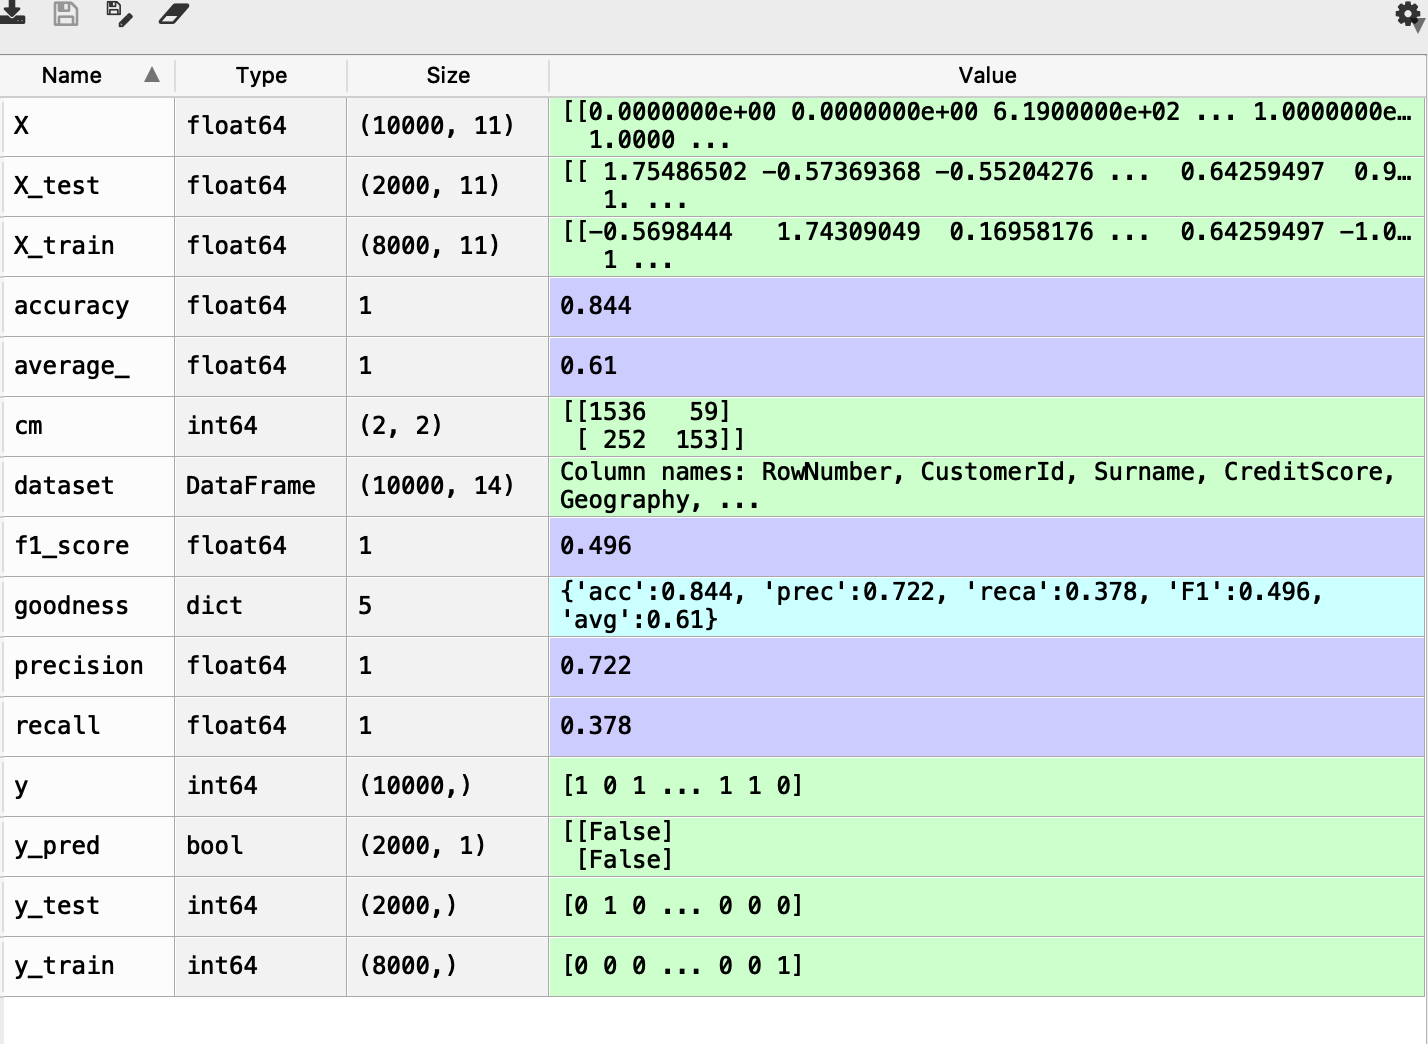